In [4]:
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.utils.data import DataLoader

from Dataset.embedding_dataset import AutoEncoder_Dataset
from Model.AutoEncoder import AutoEncoder

from Dataset.lstm_dataset import LSTM_Dataset
from Model.LSTM import LSTM

In [5]:
table_1 = pd.read_excel('../데이터/Table/table_1.xlsx', index_col=0)
table_2 = pd.read_excel('../데이터/Table/table_2.xlsx', index_col=0)
table_3 = pd.read_excel('../데이터/Table/table_3.xlsx', index_col=0)

In [6]:
embedding_batch = 32
embedding_epochs = 50
embedding_dim = 6

lstm_batch = 32
lstm_epochs = 50
window_size = 5

## Embedding

### embedding matrix

In [66]:
dataset = AutoEncoder_Dataset(table_1, table_2, table_3)
dataloader = DataLoader(dataset, batch_size=embedding_batch)

In [9]:
model = AutoEncoder(embedding_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()
train_losses = []
for epoch in range(embedding_epochs):
    total_train_loss = 0
    for data in dataloader:
        input = data[0]
        target = data[1]
        output = model(input)

        train_loss = criterion(output, target)
        total_train_loss += train_loss.item()

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{embedding_epochs}], Train Loss: {avg_train_loss:.4f}')

torch.save(model, f'../데이터/Checkpoint/embedding_batch_{embedding_batch}_epochs_{embedding_epochs}_dim_{embedding_dim}.pth')

Epoch [1/50], Train Loss: 680291770.6692
Epoch [2/50], Train Loss: 684188173.6263
Epoch [3/50], Train Loss: 689512574.3303
Epoch [4/50], Train Loss: 692086335.6111
Epoch [5/50], Train Loss: 688067731.1787
Epoch [6/50], Train Loss: 686715738.7562
Epoch [7/50], Train Loss: 682496298.9647
Epoch [8/50], Train Loss: 679622162.8559
Epoch [9/50], Train Loss: 676958141.1462
Epoch [10/50], Train Loss: 674317575.5218
Epoch [11/50], Train Loss: 672776078.0742
Epoch [12/50], Train Loss: 671834476.7615
Epoch [13/50], Train Loss: 673883822.9061
Epoch [14/50], Train Loss: 672292985.3853
Epoch [15/50], Train Loss: 670222568.7711
Epoch [16/50], Train Loss: 668870535.0658
Epoch [17/50], Train Loss: 667554694.9468
Epoch [18/50], Train Loss: 665938823.2288
Epoch [19/50], Train Loss: 664633780.7509
Epoch [20/50], Train Loss: 663488408.7713
Epoch [21/50], Train Loss: 662454541.6991
Epoch [22/50], Train Loss: 661524744.7534
Epoch [23/50], Train Loss: 660687875.5072
Epoch [24/50], Train Loss: 659936261.2933
E

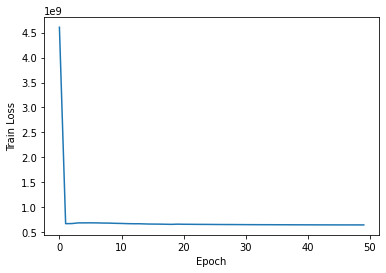

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

## LSTM

In [7]:
model = torch.load('../데이터/Checkpoint/embedding_batch_32_epochs_50_dim_6.pth')

dataset = LSTM_Dataset(model, table_1, table_2, table_3, '경남1', embedding_dim, window_size)
dataloader = DataLoader(dataset, batch_size=lstm_batch)

In [12]:
for data in dataloader:
    print(data[0].shape)
    print(data[1].shape)
    break

torch.Size([32, 5, 6])
torch.Size([32, 1])
